 Piotr Pietrzyk - Analiza danych pasażerów Titanica 
 
Tworzenie rozwiązania będzie przebiegać przez następujące etapy:

     Definicja problemu.
     Pozyskanie danych szkoleniowych i testowych.
     Przygotowanie i oczyszczenie danych.
     Analiza, identyfikacja wzorców i dane.
     Modelowanie oraz przewidywanie.
     Prezentacja kroków rozwiązywania problemów i ostateczne rozwiązanie.

In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

train_df = pd.read_csv('/home/piotr/Dokumenty/AI/train.csv')
test_df = pd.read_csv('/home/piotr/Dokumenty/AI/test.csv')
combine = [train_df, test_df]

print(train_df.columns.values)

train_df.head()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Wartości te klasyfikują próbki w podebne zestawy. W obrębie cech jakościowych są wartości nominalne, porządkowe. Pomaga nam to między innymi wybrać odpowiednie wykresy do wizualizacji. Wartości te zmieniają się z próbki na próbkę. W ramach funkcji numerycznych wartości są dyskretne, ciągłe lub oparte na 'timeseries' Pomaga nam to między innymi wybrać odpowiednie wykresy do wizualizacji.

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Całkowita liczba próbek wynosi 891 lub 40% faktycznej liczby pasażerów na pokładzie Titanica (2224).
Przetrwał to kategoryczna cecha z wartościami 0 lub 1.
Około 38% próbek przetrwało reprezentatywnie dla rzeczywistego wskaźnika przeżycia na poziomie 32%.
Większość pasażerów (> 75%) nie podróżowała z rodzicami lub dziećmi.
Prawie 30% pasażerów miało rodzeństwo i / lub małżonka na pokładzie.
Taryfy różniły się znacznie, ponieważ niewielu pasażerów (<1%) płaciło aż 512 USD.
Niewielu starszych pasażerów (<1%) w wieku 65-80 lat.

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Nazwy pasażerów są unikalne w całym zbiorze danych (liczba = unikalny = 891)
65% mężczyzn 
Wartości kabin mają kilka powtórzeń w próbkach. Alternatywnie kilku pasażerów dzieliło kabinę.
Zaokrętowany ma trzy możliwe wartości. Port S używany przez większość pasażerów (top = S)
Funkcja biletu ma wysoki współczynnik (22%) powtarzających się wartości (unikalny = 681).

In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Staneff, Mr. Ivan",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Dochodzimy do następujących założeń opartych na dotychczasowej analizie danych. Możemy zweryfikować te założenia dalej przed podjęciem odpowiednich działań.

Chcemy wiedzieć, jak dobrze każda funkcja koreluje z przeżyciem. Należy to zrobić na początku naszego projektu i dopasować korelacje do modelu w dalszej części projektu.

Należy wziąć pod uwagę funkcję Age, ponieważ jest ona z pewnością skorelowana z przetrwaniem.
Tak samo jak funkcja Embarked, ponieważ może ona również korelować z przetrwaniem lub inną ważną cechą.

Funkcja ceny biletu nie będzie brana pod uwagę, ponieważ zawiera wysoki współczynnik duplikatów (22%) i może nie być korelacji między biletem a przetrwaniem.

Funkcja Cabinet nie będzie brana pod uwagę, ponieważ jest wysoce niekompletna lub zawiera wiele wartości null zarówno w zestawie danych treningowych, jak i testowych.

PassengerId może zostać usunięty z zestawu danych szkoleniowych, ponieważ nie przyczynia się do przetrwania.

Funkcja nazwy jest stosunkowo niestandardowa, może nie przyczyniać się bezpośrednio do przetrwania, więc może zostać odrzucona.

Możemy utworzyć nową funkcję Rodzina na podstawie Parch i SibSp, aby uzyskać całkowitą liczbę członków rodziny na pokładzie.

Możemy także stworzyć nową funkcję dla wieku pasażerów. Zamieni to ciągłą funkcję numeryczną w porządkową cechę jakościową.

Możemy również dodać do naszych założeń na podstawie opisanego wcześniej problemu.

Kobiety (płeć = kobieta) częściej przeżyły.
Dzieci (wiek <?) Częściej przeżywały.
Pasażerowie wyższej klasy (Pclass = 1) częściej przeżyli.


Aby potwierdzić niektóre z naszych obserwacji i założeń, możemy szybko przeanalizować nasze korelacje cech poprzez zestawianie cech względem siebie. Możemy to zrobić tylko na tym etapie dla funkcji, które nie mają żadnych pustych wartości. Ma to również sens tylko w przypadku funkcji, które są kategoryczne (płeć), porządkowe (Pclass) lub dyskretne (SibSp, Parch).

Pclass Obserwujemy znaczącą korelację (> 0,5) między Pclass = 1 i Survived (klasyfikacja # 3).

Płeć: Potwierdzamy obserwację podczas definiowania problemu, że płeć = kobieta miała bardzo wysoki wskaźnik przeżycia na 74% (klasyfikacja # 1)

SibSp i Parch Funkcje te mają zerową korelację dla pewnych wartości. Najlepszym rozwiązaniem może być uzyskanie funkcji lub zestawu funkcji z tych indywidualnych funkcji (utworzenie # 1).

Teraz możemy potwierdzać niektóre z naszych założeń, wykorzystując wizualizacje do analizy danych.

Wykres histogramu jest przydatny do analizowania ciągłych zmiennych liczbowych, takich jak Wiek, w którym pasmo lub zakresy pomogą zidentyfikować przydatne wzory. Histogram może wskazywać rozkład próbek przy użyciu automatycznie zdefiniowanych pojemników lub równorzędnych pasm. To pomaga nam odpowiedzieć na pytania dotyczące konkretnych grupw

Niemowlęta (wiek <= 4) miały wysoki wskaźnik przeżycia.
Przeżyli starsi pasażerowie (wiek = 80 lat).
Duża liczba osób w wieku 15-25 lat nie przeżyła.
Większość pasażerów ma 15-35 lat.

Ta prosta analiza potwierdza nasze założenia jako decyzje dotyczące kolejnych etapów przepływu pracy.

Powinniśmy rozważyć Wiek (nasze założenie klasyfikujące # 2) w naszym szkoleniu modelowym.
Ukończyć funkcję Age dla wartości null (kończąc # 1).
Powinniśmy połączyć grupy wiekowe (tworzenie # 3).

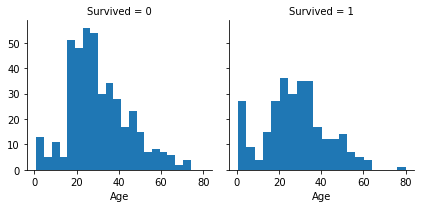

In [11]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Możemy połączyć wiele funkcji do identyfikacji korelacji za pomocą pojedynczego wykresu. Można to zrobić za pomocą cech liczbowych i jakościowych, które mają wartości liczbowe.


Pclass = 3 miał większość pasażerów, jednak większość nie przeżyła. Potwierdza nasze założenie klasyfikacyjne # 2.
Przeżyli głównie pasażerowie w Pclass = 2 i Pclass = 3. Dalej kwalifikuje nasze założenie klasyfikacyjne # 2.
Większość pasażerów w klasie Pclass = 1 przeżyła. Potwierdza nasze założenie klasyfikacyjne # 3.
Pclass różni się pod względem rozkładu wiekowego pasażerów.

Teraz możemy powiązać cechy jakościowe z naszym celem rozwiązania.

Pasażerki miały znacznie lepszy wskaźnik przeżycia niż mężczyźni. Potwierdza klasyfikację (# 1).
Wyjątek w Embarked = C, gdzie mężczyźni mieli wyższy wskaźnik przeżycia. Może to być korelacja między Pclass i Embarked, a z kolei Pclass i Survived, niekoniecznie bezpośrednia korelacja między Embarked a Survived.
Mężczyźni mieli lepszy wskaźnik przeżycia w Pclass = 3 w porównaniu z Pclass = 2. Zakończenie (#2).

/home/piotr/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


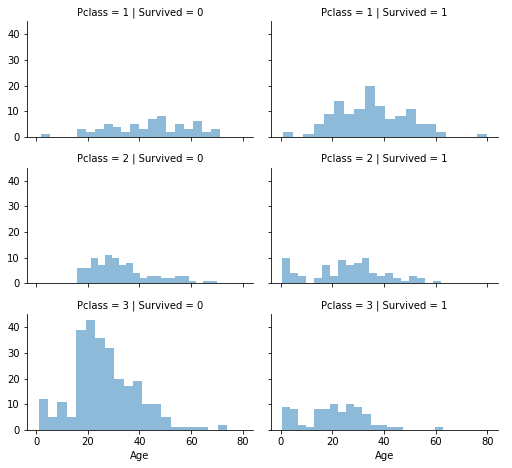

In [12]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/home/piotr/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/piotr/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/piotr/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


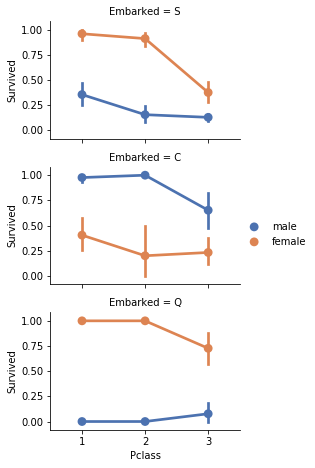

In [13]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/home/piotr/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/piotr/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


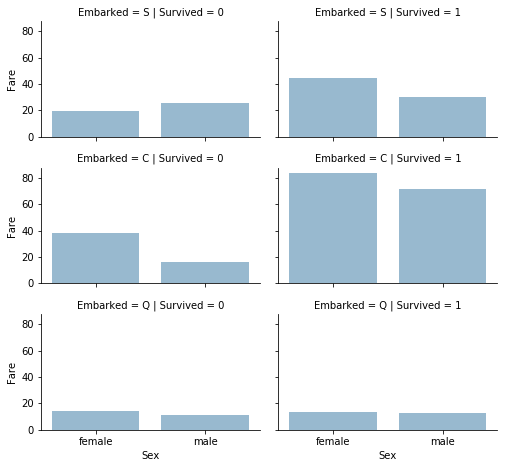

In [14]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

Zebraliśmy kilka założeń i decyzji dotyczących naszych zbiorów danych i wymagań dotyczących rozwiązań. Do tej pory nie musieliśmy zmieniać pojedynczej funkcji ani wartości, aby do nich dotrzeć. Wykonajmy teraz nasze decyzje i założenia do korygowania, tworzenia i realizacji celów.

To dobry początek do wykonania. Usuwając funkcje mamy do czynienia z mniejszą liczbą punktów danych. Przyspiesza nasz model i ułatwia analizę.

Opierając się na naszych założeniach i decyzjach, chcemy usunąć funkcje cabin (poprawianie # 2) i biletów (poprawianie # 1).

Chcemy przeanalizować, czy funkcja Nazwa może zostać użyta, aby wyodrębnić tytuły i przetestować korelację między nazwami pasażerów a przetrwaniem, przed opuszczeniem funkcji Nazwa i PassengerId.

W poniższym kodzie wyodrębniamy funkcję Title za pomocą wyrażeń regularnych. Wzorzec RegEx (w +) pasuje do pierwszego słowa kończącego się znakiem kropki w funkcji Nazwa. Flaga expand = False zwraca ramkę DataFrame.

Większość tytułów łączy dokładnie grupy wiekowe. Na przykład: Tytuł mistrza ma wiek Wiek 5 lat.
Przetrwanie wśród zespołów z epoki tytułu zmienia się nieznacznie.
Niektóre tytuły przeżyły najczęściej (Mme, Lady, Sir) lub nie (Don, Rev, Jonkheer).

Postanawiamy zachować nową funkcję tytułu dla szkolenia modelowego.

Możemy zastąpić wiele tytułów bardziej popularną nazwą lub zaklasyfikować je jako rzadkie.

Możemy przekonwertować tytuły kategoryczne na porządkowe.

Na końcu możemy bezpiecznie odrzucić funkcję Name ze szkolenia i testowania zestawów danych. Nie potrzebujemy również funkcji PassengerId w zestawie danych szkoleniowych.

In [15]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [16]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [18]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [19]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [20]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


Teraz powinniśmy oszacować i uzupełniać funkcje z brakującymi lub zerowymi wartościami. Najpierw zrobimy to dla funkcji Age.

Dokładniejszym sposobem zgadywania brakujących wartości jest użycie innych skorelowanych funkcji. W naszym przypadku zauważamy korelację między wiekiem, płcią i klasą. Wartości wieku zgadywania przy użyciu wartości mediany dla wieku w zestawach kombinacji cech Pclass i Gender. Mediana wieku dla klasy = 1 i płci = 0, klasy = 1 i płci = 1 itd.

/home/piotr/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


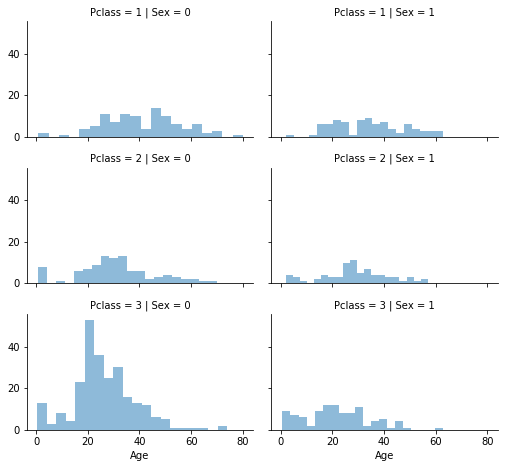

In [21]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [22]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [23]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Określmy korelacje AgeBand z Survived. Utwórzmy nową funkcję łączącą istniejące funkcje. Możemy stworzyć nową funkcję dla FamilySize, która łączy Parch i SibSp. Umożliwi nam to usunięcie Parch i SibSp z naszych zbiorów danych.

In [24]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [25]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [26]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [27]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [28]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [29]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [30]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


Dana cecha przyjmuje wartości S, Q, C w oparciu o port wsiadania. Nasz zestaw danych treningowych ma dwie brakujące wartości. Po prostu wypełniamy je najczęściej występującym zjawiskiem.

Możemy teraz ukończyć funkcję Fare dla pojedynczej brakującej wartości w zestawie danych testowych, używając trybu, aby uzyskać wartość, która występuje najczęściej dla tej funkcji. Nie tworzymy pośredniej nowej funkcji ani nie wykonujemy żadnych dalszych analiz w celu korelacji, aby odgadnąć brakującą funkcję, ponieważ zastępujemy tylko jedną wartość. Cel ukończenia osiąga pożądane wymaganie, aby algorytm modelu działał na wartościach innych niż null.

Możemy również chcieć zaokrąglić funckję Fare do dwóch miejsc po przecinku, ponieważ reprezentuje ona walutę.

In [31]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port


'S'

In [32]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [34]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [35]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [36]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [37]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


Teraz możemy stworzyć model i przewidzieć wymagane rozwiązanie. Do wyboru jest ponad 60 algorytmów modelowania predykcyjnego, aby zawęzić wybór modeli, które możemy ocenić należy ocenić problem. Naszym problemem jest problem klasyfikacji i regresji. Chcemy zidentyfikować relację między wynikami (Przetrwanymi lub nie) z innymi zmiennymi lub funkcjami (Płeć, Wiek, Port ...). Udoskonalamy również kategorię uczenia maszynowego, która jest nazywana uczeniem nadzorowanym, ponieważ szkolimy nasz model z danym zestawem danych. Dzięki tym dwóm kryteriom - nadzorowanemu uczeniu się plus klasyfikacji i regresji, możemy zawęzić nasz wybór modeli do kilku.


Regresja logistyczna to przydatny model, który można uruchomić na początku przepływu pracy. Regresja logistyczna mierzy związek między kategoryczną zmienną zależną (cechą) a jedną lub większą liczbą zmiennych niezależnych (cech) poprzez oszacowanie prawdopodobieństw przy użyciu funkcji logistycznej, która jest skumulowanym rozkładem logistycznym. możemy użyć Regresji logistycznej, aby zweryfikować nasze założenia i decyzje dotyczące tworzenia funkcji i realizacji celów. Można to zrobić, obliczając współczynnik funkcji w funkcji decyzyjnej.

Dodatnie współczynniki zwiększają logarytmiczne prawdopodobieństwo odpowiedzi (a tym samym zwiększają prawdopodobieństwo), a ujemne współczynniki zmniejszają logarytmiczne szanse odpowiedzi (a tym samym zmniejszają prawdopodobieństwo).

Płeć jest najwyższym współczynnikiem pozytywnym, co oznacza, że wraz ze wzrostem wartości (mężczyzna: 0 do kobiety: 1) prawdopodobieństwo przeżycia = 1 zwiększa się najbardziej. Odwrotnie, gdy wzrasta Pclass, prawdopodobieństwo maleje najbardziej.



Następnie używamy modelu Support Vector Machines, które są modelami uczenia się z powiązanymi algorytmami uczenia się, które analizują dane wykorzystywane do analizy klasyfikacji i regresji. Biorąc pod uwagę zestaw próbek szkoleniowych, z których każda jest oznaczona jako należąca do jednej lub drugiej z dwóch kategorii, algorytm treningowy SVM buduje model, który przypisuje nowe próbki testowe do jednej lub drugiej kategorii, co czyni z niej nie probabilistyczny binarny klasyfikator liniowy.
Należy zauważyć, że model generuje wynik ufności, który jest wyższy niż model regresji logistycznej.




In [38]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/home/piotr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.36

In [40]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287164
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311199
0,Pclass,-0.749006


In [41]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/home/piotr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.84

W rozpoznawaniu wzorców algorytm k-Nearest Neighbors (lub w skrócie k-NN) jest nieparametryczną metodą stosowaną do klasyfikacji i regresji. Próbka jest klasyfikowana według większości głosów sąsiadów, przy czym próbka jest przypisywana do klasy najczęściej występującej wśród k najbliższych sąsiadów (k jest dodatnią liczbą całkowitą, zazwyczaj małą). Jeśli k = 1, obiekt jest po prostu przypisywany do klasy tego najbliższego najbliższego sąsiada. 
Ocena zaufania KNN jest lepsza niż regresja logistyczna, ale gorsza niż SVM.



W uczeniu maszynowym klasyfikatory Bayesa są rodziną prostych probabilistycznych klasyfikatorów opartych na zastosowaniu twierdzenia Bayesa z silnymi (naiwnymi) założeniami niezależności między cechami. Klasyfikatory Naive Bayes są wysoce skalowalne, wymagają szeregu parametrów liniowych w liczbie zmiennych (cech) w problemie uczenia się. Model uzyskał wynik pewności siebie najniższy spośród dotychczas ocenianych modeli.

In [42]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In [43]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

In [44]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/home/piotr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


78.0

Perceptron jest algorytmem do nadzorowanego uczenia klasyfikatorów binarnych (funkcji, które mogą decydować, czy dane wejściowe, reprezentowane przez wektor liczb, należą do określonej klasy, czy nie). Jest to rodzaj klasyfikatora liniowego, tj. Algorytm klasyfikacji, który sprawia, że ​​jego przewidywania opierają się na liniowej funkcji predykcyjnej łączącej zbiór wag z wektorem cech. Algorytm pozwala na uczenie się online, ponieważ przetwarza elementy zestawu treningowego pojedynczo.

In [45]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/home/piotr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.01

In [46]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/home/piotr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


72.5

In [47]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

Model ten wykorzystuje drzewo decyzyjne jako model predykcyjny, który odwzorowuje cechy (gałęzie drzewa) na wnioski dotyczące wartości docelowej (liście drzew). Modele drzew, w których zmienna docelowa może przyjąć skończony zestaw wartości, nazywane są drzewami klasyfikacyjnymi; w tych strukturach drzewa liście reprezentują etykiety klas, a gałęzie reprezentują spójniki funkcji, które prowadzą do tych etykiet klas. Drzewa decyzyjne, w których zmienna docelowa może przyjmować wartości ciągłe (zwykle liczby rzeczywiste), nazywane są drzewami regresji.


Kolejny model Random Forests jest jednym z najbardziej popularnych. Random Forests są metodą uczenia grupowego dla klasyfikacji, regresji i innych zadań, które działają poprzez konstruowanie wielu drzew decyzyjnych (n_estimators = 100) w czasie szkolenia i wyprowadzanie klasy, która jest trybem klas (klasyfikacja) lub oznacza przewidywanie (regresję) poszczególnych drzew.

In [48]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [49]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.01
5,Perceptron,78.00
6,Stochastic Gradient Decent,72.50
4,Naive Bayes,72.28


In [50]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [51]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


Możemy teraz ocenić naszą ocenę wszystkich modeli, aby wybrać najlepszą dla naszego problemu. Podczas gdy zarówno „Decision Tree”, jak i „Random Forest” mają taką samą wartość, możemy wybrać Random Forest, ponieważ koryguje on nawyk w dopasowywaniu odnoścnie do zestawu treningowego.